<a href="https://colab.research.google.com/github/JulverRMP/Project02_Predictive-Maintenance/blob/main/PROJECT_Predictive_Maintenance_Parte4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acerca del conjunto de datos

Se compone de los siguientes datos:

* **Condiciones y uso de la máquina:** Las condiciones de funcionamiento de una máquina, por ejemplo, datos recopilados de sensores.

* **Historial de fallas:** el historial de fallas de una máquina o componente dentro de la máquina.

* **Historial de mantenimiento:** el historial de reparaciones de una máquina, por ejemplo, códigos de error, actividades de mantenimiento anteriores o reemplazos de componentes.

* **Características de la máquina:** Las características de una máquina, por ejemplo, tamaño del motor, marca y modelo, ubicación.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Detalles

1. **Datos de series temporales de telemetría (PdM_telemetry.csv) :** Consiste en un promedio horario de voltaje, rotación, presión y vibración recopilados de `100 máquinas para el año 2015`.

2. **Error (PdM_errors.csv) :** estos son errores que encuentran las máquinas mientras están en condiciones de funcionamiento. Dado que `estos errores no apagan las máquinas, no se consideran fallas`. La fecha y la hora del error se redondean a la hora más cercana, ya que los datos de telemetría se recopilan a una tarifa por hora.

3. **Mantenimiento (PdM_maint.csv) :** si se reemplaza un componente de una máquina, eso se captura como un registro en esta tabla. Los componentes se reemplazan en dos situaciones:
  1. Durante la visita regular programada, el técnico lo reemplazó (Mantenimiento Proactivo)
  2. Un componente se descompone y luego el técnico realiza un mantenimiento no programado para reemplazar el componente (Mantenimiento Reactivo). Esto se considera una falla y los datos correspondientes se capturan en Fallas.
  
  Los datos de mantenimiento `tienen registros de 2014 y 2015`. Estos datos se redondean a la hora más cercana, ya que los datos de telemetría se recopilan a una tarifa por hora.

4. **Fallos (PdM_failures.csv) :** cada registro representa `el reemplazo de un componente debido a un fallo`. Estos datos son un subconjunto de datos de mantenimiento. Estos datos se redondean a la hora más cercana, ya que los datos de telemetría se recopilan a una tarifa por hora.

5. **Metadatos de las máquinas (PdM_Machines.csv) :** `tipo de modelo y antigüedad de las máquinas`.

Fuente de la data:
https://azuremlsampleexperiments.blob.core.windows.net/datasets


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
data1 = '/content/drive/MyDrive/BOOTCAMP-DATA_ANALYTICS/PROYECTO/Mantenimiento Predictivo/DATA/PdM_telemetry.csv'
df_telemetry = pd.read_csv(data1)

In [4]:
data2 = '/content/drive/MyDrive/BOOTCAMP-DATA_ANALYTICS/PROYECTO/Mantenimiento Predictivo/DATA/PdM_errors.csv'
df_errors = pd.read_csv(data2)

In [5]:
data3 = '/content/drive/MyDrive/BOOTCAMP-DATA_ANALYTICS/PROYECTO/Mantenimiento Predictivo/DATA/PdM_maint.csv'
df_maint = pd.read_csv(data3)

In [6]:
data4 = '/content/drive/MyDrive/BOOTCAMP-DATA_ANALYTICS/PROYECTO/Mantenimiento Predictivo/DATA/PdM_failures.csv'
df_fail = pd.read_csv(data4)

In [7]:
data5 = '/content/drive/MyDrive/BOOTCAMP-DATA_ANALYTICS/PROYECTO/Mantenimiento Predictivo/DATA/PdM_machines.csv'
df_machine = pd.read_csv(data5)

In [8]:
df_telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [9]:
df_telemetry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  object 
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB


In [10]:
df_errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [11]:
df_errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [12]:
df_maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [13]:
df_maint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3286 non-null   object
 1   machineID  3286 non-null   int64 
 2   comp       3286 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB


In [14]:
df_fail.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [15]:
df_fail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [16]:
df_machine.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [17]:
df_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


Se verifican que en los datos no existen valores nulos en cada dataframe

In [18]:
df_telemetry.isna().sum() * 100/len(df_telemetry)

datetime     0.0
machineID    0.0
volt         0.0
rotate       0.0
pressure     0.0
vibration    0.0
dtype: float64

In [19]:
df_errors.isna().sum() * 100/len(df_errors)

datetime     0.0
machineID    0.0
errorID      0.0
dtype: float64

In [20]:
df_maint.isna().sum() * 100/len(df_maint)

datetime     0.0
machineID    0.0
comp         0.0
dtype: float64

In [21]:
df_fail.isna().sum() * 100/len(df_fail)

datetime     0.0
machineID    0.0
failure      0.0
dtype: float64

In [22]:
df_machine.isna().sum() * 100/len(df_machine)

machineID    0.0
model        0.0
age          0.0
dtype: float64

## Inspección y Limpieza de la data

Se verifica si hay datos duplicados con el método duplicate

In [23]:
df_telemetry.duplicated().sum()

0

In [24]:
df_errors.duplicated().sum()

0

In [25]:
df_maint.duplicated().sum()

0

In [26]:
df_fail.duplicated().sum()

0

In [27]:
df_machine.duplicated().sum()

0

Según se observa en los resultados anteriores, no se encuentran datos duplicados en ninguno de los dataframe

# EDA

## Arreglo del formato de fecha y hora

In [28]:
tablas = [df_telemetry, df_errors, df_maint, df_fail]
for df in tablas:
    df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")
    #df.sort_values(["datetime", "machineID"], inplace=True, ignore_index=True)

## **Datos de Telemetría**

(PdM_telemetry.csv) : Consiste en un promedio horario de voltaje, rotación, presión y vibración recopilados de 100 máquinas para el año 2015.



In [29]:
df_telemetry.sort_values(["datetime", "machineID"], ignore_index=True).head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 06:00:00,2,176.558913,424.624162,76.005332,43.767049
2,2015-01-01 06:00:00,3,185.482043,461.211137,87.453199,28.216864
3,2015-01-01 06:00:00,4,169.710847,463.646727,95.929877,38.400372
4,2015-01-01 06:00:00,5,165.082899,452.283576,84.591722,40.298803


In [30]:
df_telemetry.shape

(876100, 6)

¿Cuantas maquinas tienen registro de sus sensores?

In [31]:
df_telemetry['machineID'].nunique()

100

¿Cual es el intervalo de tiempo en la data?

In [32]:
df_telemetry['datetime'].describe()

count                 876100
mean     2015-07-02 18:00:00
min      2015-01-01 06:00:00
25%      2015-04-02 12:00:00
50%      2015-07-02 18:00:00
75%      2015-10-02 00:00:00
max      2016-01-01 06:00:00
Name: datetime, dtype: object

Por lo tanto se obtiene que la distribucion del la fecha y hora en la data de telemetria es desde el primero de enero del 2015 a las 06:00 horas, hasta el primero de enero del 2016 a las 06:00 horas.

¿Falta alguna fecha y hora en el intervalo de 01/01/2015 al 01/01/2016?

In [33]:
pd.date_range(start="2015-01-01 06:00:00", end="2016-01-01 06:00:00", freq='H').difference(df_telemetry['datetime'])

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

por lo tanto no hay datos faltantes en el intervalo de 01/01/2015 al 01/01/2016 en frecuencia de 1 hora..

In [34]:
df_telemetry.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,876100,2015-07-02 18:00:00,2015-01-01 06:00:00,2015-04-02 12:00:00,2015-07-02 18:00:00,2015-10-02 00:00:00,2016-01-01 06:00:00,NaN
machineID,876100.0,50.5,1.0,25.75,50.5,75.25,100.0,28.866087
volt,876100.0,170.777736,97.333604,160.304927,170.607338,181.004493,255.124717,15.509114
rotate,876100.0,446.605119,138.432075,412.305714,447.55815,482.1766,695.020984,52.673886
pressure,876100.0,100.858668,51.237106,93.498181,100.425559,107.555231,185.951998,11.048679
vibration,876100.0,40.385007,14.877054,36.777299,40.237247,43.784938,76.791072,5.370361


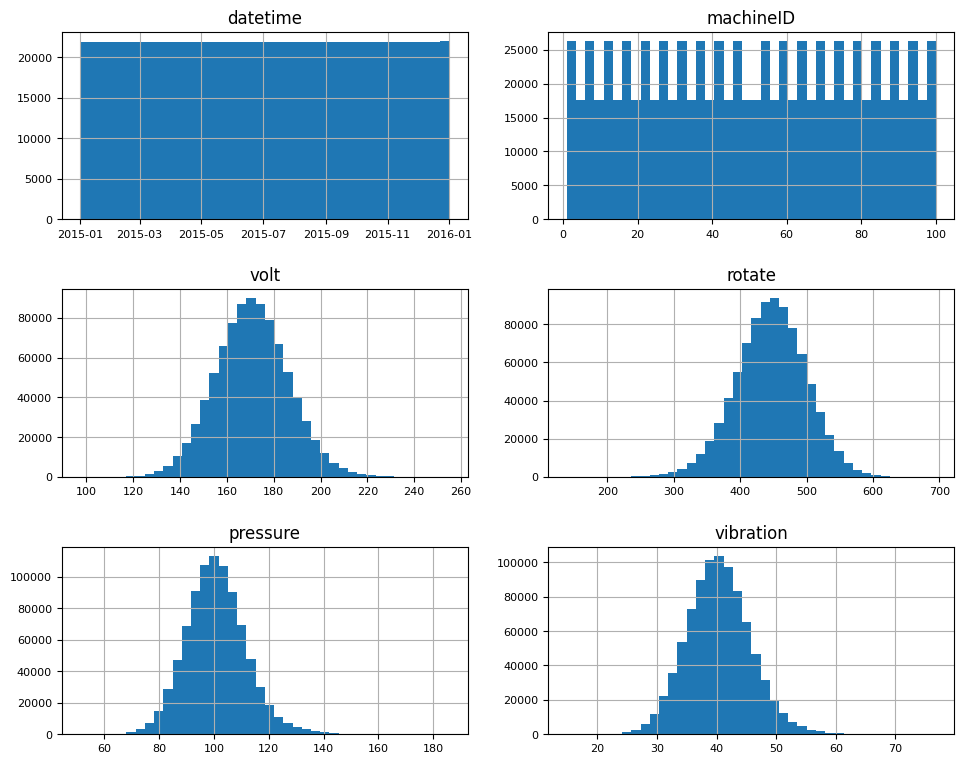

In [35]:
df_telemetry.hist(bins=40, figsize=(10, 8), xlabelsize='8', ylabelsize='8')
plt.tight_layout(pad=2.0)
plt.show()

Los cuatro parámetros de los sensores de  voltaje, vibración, presión y rotación tienen una distribución normalmente.

**Se grafica la distribución de la vibración a lo largo del 2015 para la maquina 1**

In [36]:
df_vib_m1 = df_telemetry[df_telemetry['machineID'] == 1][["datetime", "vibration"]].reset_index(drop=True)

fig = px.line(x=df_vib_m1['datetime'].values, y=df_vib_m1['vibration'].values, title='Maquina 1-Vibración Vs tiempo', template='plotly_dark')
fig.update_layout(xaxis_title='Tiempo', yaxis_title='Vibración')
fig.show()


Se observa picos elevados de vibración en ciertos meses del año, esto podria deberse a algun tipo de falla..

## **Datos de Errores**

Error (PdM_errors.csv) : estos son errores que encuentran las máquinas mientras están en condiciones de funcionamiento. Dado que estos errores no apagan las máquinas, no se consideran fallas. La fecha y la hora del error se redondean a la hora más cercana, ya que los datos de telemetría se recopilan a una tarifa por hora.

In [37]:
df_errors.sort_values(["datetime", "machineID"], ignore_index=True).head()

,datetime,machineID,errorID
0,2015-01-01 06:00:00,24,error1
1,2015-01-01 06:00:00,73,error4
2,2015-01-01 06:00:00,81,error1
3,2015-01-01 07:00:00,43,error3
4,2015-01-01 08:00:00,14,error4


In [38]:
df_errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   3919 non-null   datetime64[ns]
 1   machineID  3919 non-null   int64         
 2   errorID    3919 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 92.0+ KB


In [39]:
df_errors.shape

(3919, 3)

Se han registrado 3919 advertencias de error para las 100 maquinas a lo largo del 2015

¿Cuantas maquinas tienen registro de errores?

In [40]:
df_errors['machineID'].nunique()

100

¿Cual es el intervalo de tiempo en la data?

In [41]:
df_errors['datetime'].describe()

count                             3919
mean     2015-07-01 03:34:18.586374144
min                2015-01-01 06:00:00
25%                2015-03-31 05:00:00
50%                2015-07-01 06:00:00
75%                2015-10-01 15:00:00
max                2016-01-01 05:00:00
Name: datetime, dtype: object

Los datos de error se distribuyen entre el 1 de enero de 2015 y el 1 de enero de 2016.

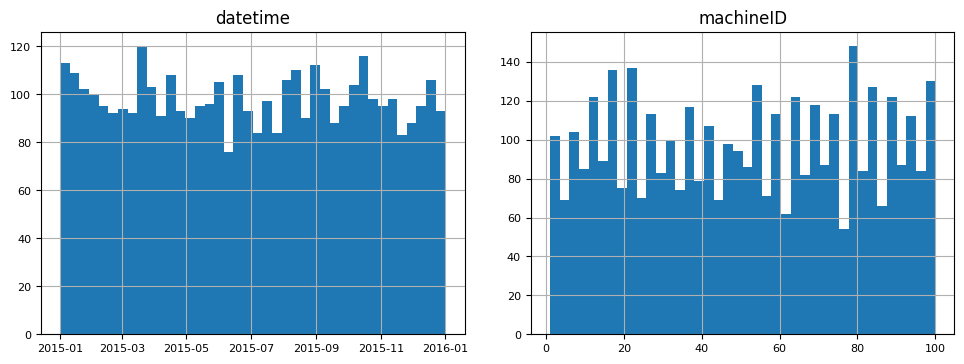

In [42]:
df_errors.hist(bins=40, figsize=(10, 4), xlabelsize='8', ylabelsize='8')
plt.tight_layout(pad=2.0)
plt.show()

La data presenta una buena distribución del tiempo y de registro de errores.

**Se grafica la distribución de los Errores que no apagan la maquina**

In [43]:
# Primero, agregamos una columna con el recuento de cada tipo de error
df_errors_counts = df_errors['errorID'].value_counts().reset_index()
df_errors_counts.columns = ['errorID', 'Count']

# Luego, ordenamos el DataFrame por el recuento en orden descendente
df_errors_counts = df_errors_counts.sort_values(by='Count', ascending=False)

# Ahora creamos el gráfico de barras con los datos ordenados
fig = px.bar(x=df_errors_counts['errorID'], y=df_errors_counts['Count'],
             title='Distribución de Errores', template='plotly_dark', color=df_errors_counts['errorID'])
fig.update_layout(xaxis_title='Tipo de Error', yaxis_title='Distribución')
fig.show()

Se observa que el error 1 es el que se presenta con mayor incidencia en las 100 maquinas


**Se grafica la distribución de los Errores vs el ID de cada máquina**

In [44]:
# Calcula el recuento de errores por machineID y los ordena de mayor a menor
counts_sorted = df_errors['machineID'].value_counts().sort_values(ascending=False).reset_index()
counts_sorted['machineID'] = counts_sorted['machineID'].astype(str)
# Crea el gráfico de barras ordenando los datos
fig = px.bar(x=counts_sorted['machineID'],
             y=counts_sorted['count'],
             labels={'x':'ID de la Máquina', 'y':'Número de Errores'},
             title='Número de Errores por Máquina',template='plotly_dark', color=counts_sorted['count'])

fig.show()

De la grafica se observa que la mmaquina con mayor numero de incidencias de errores en el 22  la maquina con el menor número de errores es el 77

**Se grafica la distribución de los tipos de Errores vs el ID de cada máquina**

In [45]:
g01=df_errors.groupby(['machineID','errorID']).count().reset_index()
g01.columns = ["machineID", "errorID", "errVal"]

df_err_piv = pd.pivot(g01, index="machineID", columns="errorID", values="errVal").rename_axis(None, axis=1)
df_err_piv = df_err_piv.reset_index()

df_err_piv['machineID'] = df_err_piv['machineID'].astype(str)

# Crear el gráfico de barras apilado con Plotly Express
fig = px.bar(df_err_piv, x='machineID', y=df_err_piv.columns[1:], title="Distriución de los tipos de Errores para cada Máquina",
             labels={'machineID': 'ID de la Máquina', 'value': 'Número de Errores'},
             template='plotly_dark', barmode='stack')

fig.update_layout(legend_title_text='Errores')
# Mostrar el gráfico
fig.show()


Se observa que la maquina 22 tiene el registro con mayor numero de errores, ademas que es la maquina con la mayor incidencia en el error 04.

**Se grafica la distribución de los errores por dia a lo largo del 2015**

In [46]:
df_err_d = df_errors['datetime'].dt.date.value_counts().sort_index().reset_index()

fig = px.line(x=df_err_d['datetime'].values, y=df_err_d['count'].values, title='Errores Vs Tiempo', template='plotly_dark')
fig.update_layout(xaxis_title='Tiempo (Dia)', yaxis_title='Errores')
fig.show()


Se observa que el 19 de enero del 2015 se tiene el ayor numero de registro de errores

## **Datos de Mantenimiento**

Mantenimiento (PdM_maint.csv) : si se reemplaza un componente de una máquina, eso se captura como un registro en esta tabla. Los componentes se reemplazan en dos situaciones:

1. Durante la visita regular programada, el técnico lo reemplazó (Mantenimiento Proactivo)

2. Un componente se descompone y luego el técnico realiza un mantenimiento no programado para reemplazar el componente (Mantenimiento Reactivo). Esto se considera una falla y los datos correspondientes se capturan en Fallas.

In [47]:
df_maint.sort_values(["datetime", "machineID"], ignore_index=True).head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-06-01 06:00:00,6,comp2
2,2014-06-01 06:00:00,9,comp1
3,2014-06-01 06:00:00,9,comp2
4,2014-06-01 06:00:00,11,comp2


In [48]:
df_maint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   3286 non-null   datetime64[ns]
 1   machineID  3286 non-null   int64         
 2   comp       3286 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.1+ KB


In [49]:
df_maint.shape

(3286, 3)

Se han registrado 3286 registros de mantenimiento proactivo y reactivo de las maquinas

¿Cuantas maquinas tienen registro de mantenimiento?

In [50]:
df_maint['machineID'].nunique()

100

¿Cual es el intervalo de tiempo en la data?

In [51]:
df_maint['datetime'].describe()

count                             3286
mean     2015-05-30 14:40:36.518563840
min                2014-06-01 06:00:00
25%                2015-03-03 06:00:00
50%                2015-06-13 06:00:00
75%                2015-09-18 00:00:00
max                2016-01-01 06:00:00
Name: datetime, dtype: object

Los datos de mantenimiento se distribuyen entre el 1 de junio de 2014 y el 1 de enero de 2016.

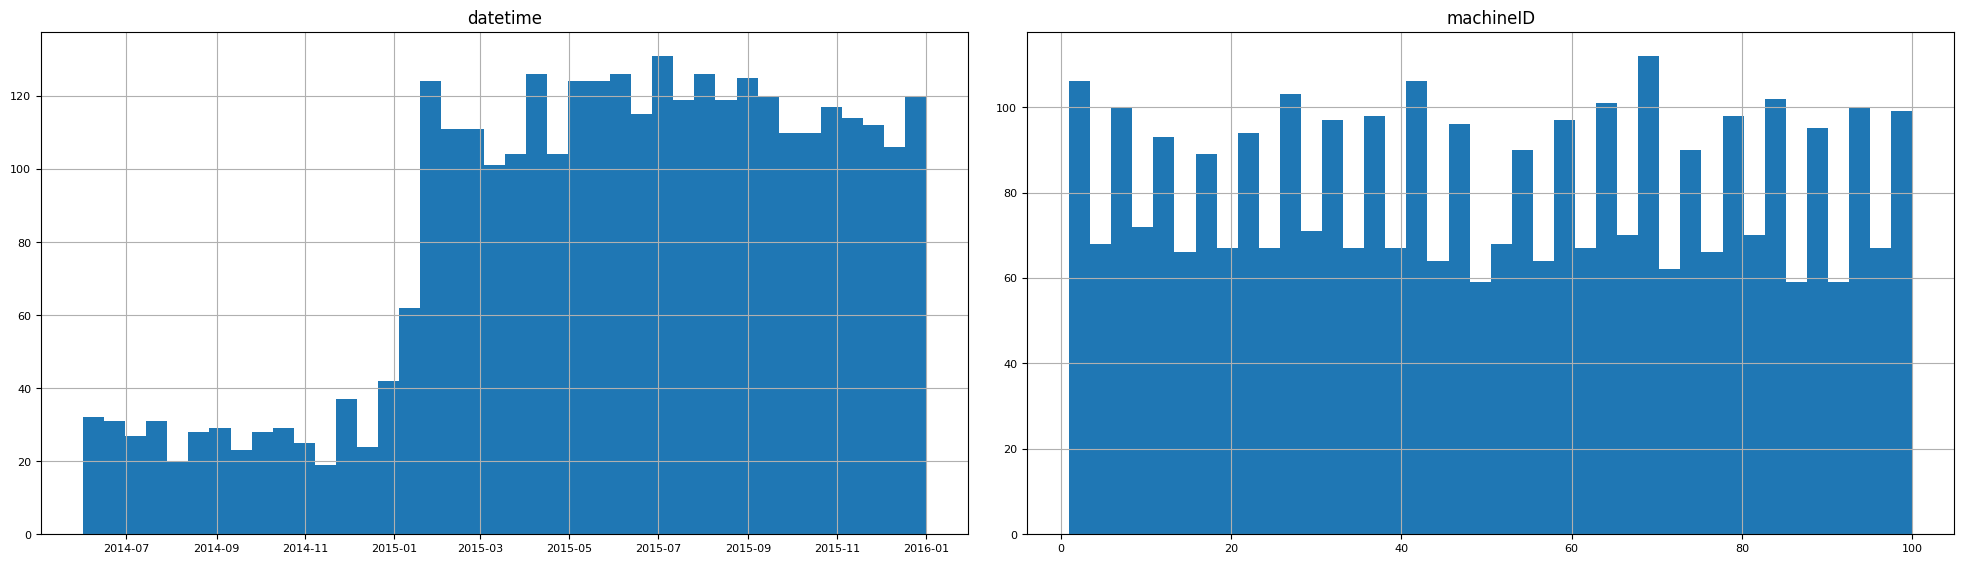

In [52]:
df_maint.hist(bins=40, figsize=(20, 6), xlabelsize='8', ylabelsize='8')
plt.tight_layout(pad=2.0)
plt.show()

La data presenta una buena distribución del tiempo en el año 2015 y registro de maquinas.

Se filtra la data al rango del año 2015, debido a que la mayor distribución de registro de mantenimiento se encuentra en el año 2015 y ademas que la data de registro de errores y telemetria tambien se encuentran en dicho rango.

In [53]:
start_d= "2015-01-01 06:00:00"
end_d= "2016-01-01 06:00:00"
df_maint_2015=df_maint[((df_maint['datetime']>=start_d)&(df_maint['datetime']<=end_d))]

In [54]:
df_maint_2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2886 entries, 4 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   2886 non-null   datetime64[ns]
 1   machineID  2886 non-null   int64         
 2   comp       2886 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 90.2+ KB


In [55]:
df_maint_2015['machineID'].nunique()

100

**Se grafica la distribución de los componentes que se reemplazaron en los mantenimientos en el 2015**

In [56]:
# Primero, agregamos una columna con el recuento de cada tipo de error
df_maint15_counts = df_maint_2015['comp'].value_counts().reset_index()
df_maint15_counts.columns = ['comp', 'Count']

# Luego, ordenamos el DataFrame por el recuento en orden descendente
df_maint15_counts = df_maint15_counts.sort_values(by='Count', ascending=False)

# Ahora creamos el gráfico de barras con los datos ordenados
fig = px.bar(x=df_maint15_counts['comp'], y=df_maint15_counts['Count'],
             title='Distribución de Componentes', template='plotly_dark', color=df_maint15_counts['comp'])
fig.update_layout(xaxis_title='Tipo de Componente', yaxis_title='Distribución')
fig.show()

Se observa que los componentes reemplaados esta practicamente balanceados entre los 4 componentes

**Se grafica la distribución de reemplazo de los componentes en el 2015 vs el ID de cada máquina**

In [57]:
# Calcula el recuento de errores por machineID y los ordena de mayor a menor
countsm15_sorted = df_maint_2015['machineID'].value_counts().sort_values(ascending=False).reset_index()
countsm15_sorted['machineID'] = countsm15_sorted['machineID'].astype(str)
# Crea el gráfico de barras ordenando los datos
fig = px.bar(x=countsm15_sorted['machineID'],
             y=countsm15_sorted['count'],
             labels={'x':'ID de la Máquina', 'y':'Número de Reemplazos'},
             title='Número de Reemplazos de Componentes por Máquina',template='plotly_dark', color=countsm15_sorted['count'])

fig.show()

Se observa en el gráfico que la maquina 70 es la que ha tenido mayor numero de reemplazos de componentes, ademas que la maquina 53 es la que ha tenido el menor numero de reemplazos de coomponentes

**Se grafica la distribución de los tipos de componentes reemplazados en el 2015 vs el ID de cada máquina**

In [58]:
g02=df_maint_2015.groupby(['machineID','comp']).count().reset_index()
g02.columns = ["machineID", "comp", "compVal"]

df_maint15_piv = pd.pivot(g02, index="machineID", columns="comp", values="compVal").rename_axis(None, axis=1)
df_maint15_piv = df_maint15_piv.reset_index()

df_maint15_piv['machineID'] = df_maint15_piv['machineID'].astype(str)

# Crear el gráfico de barras apilado con Plotly Express
fig = px.bar(df_maint15_piv, x='machineID', y=df_maint15_piv.columns[1:], title="Distribución de los tipos de componentes reemplazados para cada Máquina",
             labels={'machineID': 'ID de la Máquina', 'value': 'Número de Componentes'},
             template='plotly_dark', barmode='stack')

fig.update_layout(legend_title_text='Componentes')
# Mostrar el gráfico
fig.show()


**Se grafica la distribución de los componentes reemplazados por dia a lo largo del 2015**

In [59]:
df_maint15_d = df_maint_2015['datetime'].dt.date.value_counts().sort_index().reset_index()
df_maint15_d.columns=['datetime','count']

fig = px.line(x=df_maint15_d['datetime'].values, y=df_maint15_d['count'].values, title='Reemplazo de Componentes Vs Tiempo (Dia)', template='plotly_dark')
fig.update_layout(xaxis_title='Tiempo (Dia)', yaxis_title='Componentes')
fig.show()


Se observa que el 31 de enero se genero el ayyor numero de cambios de componentes

**Se grafica la distribución de los componentes reemplazados por mes a lo largo del 2015**

In [60]:
df_maint15_m = df_maint_2015.groupby(df_maint_2015['datetime'].dt.to_period('M')).size().sort_index().reset_index()
df_maint15_m.columns=['datetime','count']
df_maint15_m=df_maint15_m.drop(df_maint15_m.index[-1])

# Convertir los valores de la columna 'datetime' a cadenas de texto
df_maint15_m['datetime'] = df_maint15_m['datetime'].astype(str)

fig = px.line(x=df_maint15_m['datetime'].values, y=df_maint15_m['count'].values, title='Reemplazo de Componentes Vs Tiempo (Mes)', template='plotly_dark')
fig.update_layout(xaxis_title='Tiempo (Mes)', yaxis_title='Componentes')
fig.show()


Según el grafico los cambios de componentes van en aumento desde enero del 2015 hasta noviembre del 2015

## **Datos de Fallas**

Fallos (PdM_failures.csv) : cada registro representa el reemplazo de un componente debido a un fallo. Estos datos son un subconjunto de datos de mantenimiento. Estos datos se redondean a la hora más cercana, ya que los datos de telemetría se recopilan a una tarifa por hora.

In [61]:
df_fail.sort_values(["datetime", "machineID"], ignore_index=True).head()

,datetime,machineID,failure
0,2015-01-02 03:00:00,16,comp1
1,2015-01-02 03:00:00,16,comp3
2,2015-01-02 03:00:00,17,comp4
3,2015-01-02 03:00:00,22,comp1
4,2015-01-02 03:00:00,35,comp1


In [62]:
df_fail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   761 non-null    datetime64[ns]
 1   machineID  761 non-null    int64         
 2   failure    761 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 18.0+ KB


In [63]:
df_fail.shape

(761, 3)

Se han registrado 761 registros de mantenimiento reactivos de las maquinas, es decir registros de fallas.

¿Cuantas maquinas tienen registro de mantenimiento reactivo (Fallas)?

In [64]:
df_fail['machineID'].nunique()

98

Solo 98 maquinas registraron fallas durante el año del 2015

Se verifica que maquinas no tienen registro de falla

In [65]:
# Crear una lista de todas las máquinas posibles (del 1 al 100)
all_machines = list(range(1, 101))

# Obtener una lista de las máquinas únicas presentes en el DataFrame df_fail
machines_present = df_fail['machineID'].unique()

# Encontrar las máquinas que no están presentes en el DataFrame df_fail
machines_not_present = [machine for machine in all_machines if machine not in machines_present]

# Mostrar las máquinas que no están presentes
print("Máquinas no presentes en la columna 'machineID':")
print(machines_not_present)

Máquinas no presentes en la columna 'machineID':
[6, 77]


¿Cual es el intervalo de tiempo en la data?

In [66]:
df_fail['datetime'].describe()

count                              761
mean     2015-06-24 12:12:17.976346880
min                2015-01-02 03:00:00
25%                2015-03-23 06:00:00
50%                2015-06-24 06:00:00
75%                2015-09-23 06:00:00
max                2015-12-31 06:00:00
Name: datetime, dtype: object

Los datos de mantenimiento reactivo se distribuyen entre el 2 de enero de 2015 y el 31 de diciembre de 2015.

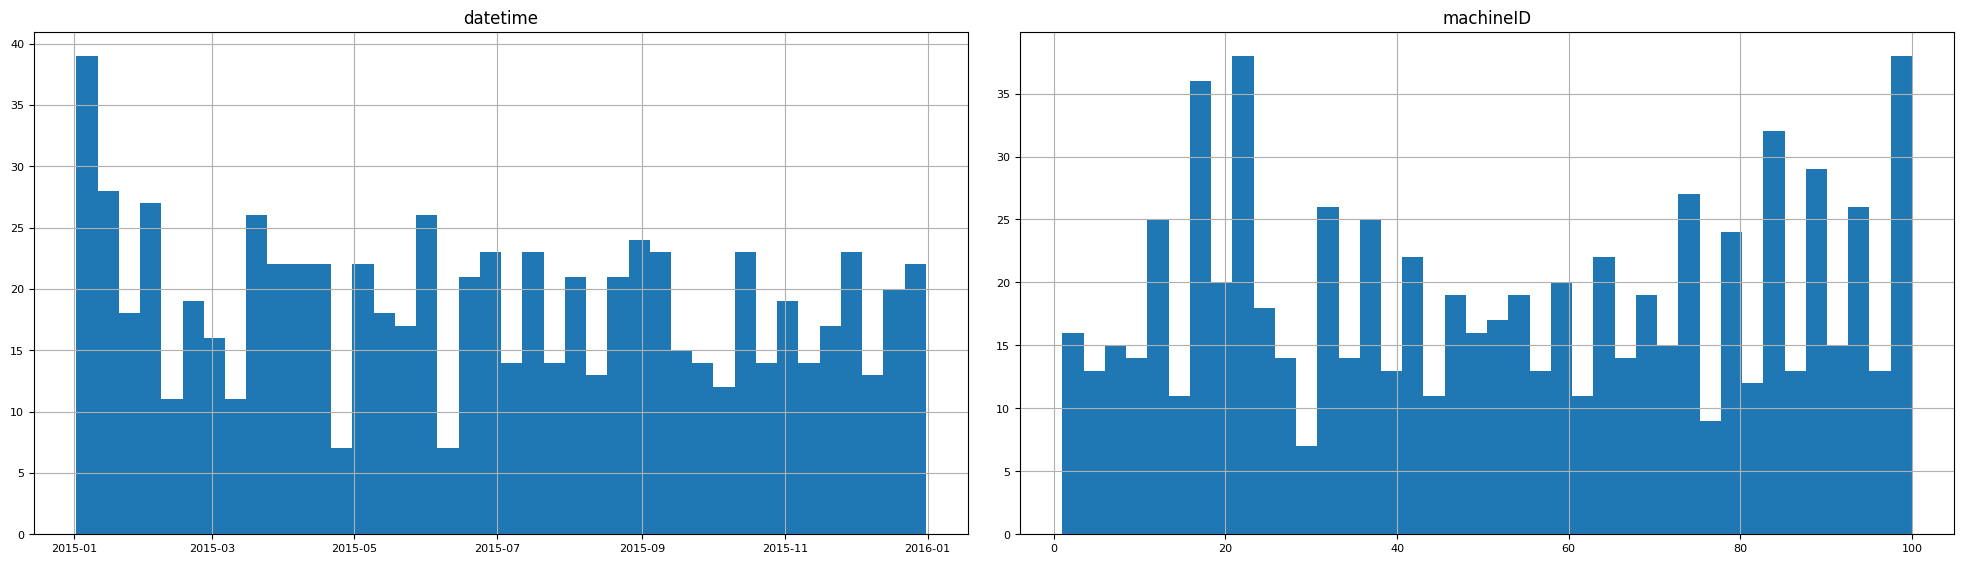

In [67]:
df_fail.hist(bins=40, figsize=(20, 6), xlabelsize='8', ylabelsize='8')
plt.tight_layout(pad=2.0)
plt.show()

Los datos presentan una buena distribución.

**Se grafica la distribución de los Fallas que apagan la maquina**

In [68]:
# Primero, agregamos una columna con el recuento de cada tipo de error
df_fail_counts = df_fail['failure'].value_counts().reset_index()
df_fail_counts.columns = ['failure', 'Count']

# Luego, ordenamos el DataFrame por el recuento en orden descendente
df_fail_counts = df_fail_counts.sort_values(by='Count', ascending=False)

# Ahora creamos el gráfico de barras con los datos ordenados
fig = px.bar(x=df_fail_counts['failure'], y=df_fail_counts['Count'],
             title='Distribución de Fallas', template='plotly_dark', color=df_fail_counts['failure'])
fig.update_layout(xaxis_title='Tipo de Componente', yaxis_title='Distribución')
fig.update_layout(legend_title_text='Componentes')
fig.show()

Se observa que el componente 2 fue el que mmas se reemplazo en los mantenimientos correctivos.

**Se grafica la distribución de Fallas vs el ID de cada máquina**

In [69]:
# Calcula el recuento de errores por machineID y los ordena de mayor a menor
fail_sorted = df_fail['machineID'].value_counts().sort_values(ascending=False).reset_index()
fail_sorted['machineID'] = fail_sorted['machineID'].astype(str)
# Crea el gráfico de barras ordenando los datos
fig = px.bar(x=fail_sorted['machineID'],
             y=fail_sorted['count'],
             labels={'x':'ID de la Máquina', 'y':'Número de Fallas'},
             title='Número de Fallas por Máquina',template='plotly_dark', color=fail_sorted['count'])

fig.show()

Se concluye que la maquina 99 es la que tiene mayor mantenimiento correctivo y la maquina 57 es la ue tiene menor mantenimiento correctivo.

**Se grafica la distribución de las Fallas por dia a lo largo del 2015**

In [70]:
df_fail_d = df_fail['datetime'].dt.date.value_counts().sort_index().reset_index()

df_fail_d.columns=['datetime','count']

fig = px.line(x=df_fail_d['datetime'].values, y=df_fail_d['count'].values, title='Registro de Fallas Vs Tiempo (Dia)', template='plotly_dark')
fig.update_layout(xaxis_title='Tiempo (Dia)', yaxis_title='Fallas')
fig.show()


El 2 de enero se concentra el mayor numero de fallas para las 100 maquinas

**Se grafica la distribución de las Fallas por mes a lo largo del 2015**

In [71]:
df_fail_m = df_fail.groupby(df_maint_2015['datetime'].dt.to_period('M')).size().sort_index().reset_index()
df_fail_m.columns=['datetime','count']
df_fail_m=df_fail_m.drop(df_fail_m.index[-1])

# Convertir los valores de la columna 'datetime' a cadenas de texto
df_fail_m['datetime'] = df_fail_m['datetime'].astype(str)

fig = px.line(x=df_fail_m['datetime'].values, y=df_fail_m['count'].values, title='Registro de Fallas Vs Tiempo (Mes)', template='plotly_dark')
fig.update_layout(xaxis_title='Tiempo (Mes)', yaxis_title='Fallas')
fig.show()


El registro de fallas sigue una tendecia al aumendto desde enero del 2015 a noviembre del 2015

## **Datos de las Máquinas**

Metadatos de las máquinas (PdM_Machines.csv) : tipo de modelo y antigüedad de las máquinas.

In [72]:
df_machine.sort_values(["machineID", 'model'], ignore_index=True).head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [73]:
df_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [74]:
df_machine.shape

(100, 3)

Se han registrado 100 maquinas en total.

¿Cuantos modelos de maquinas se tienen dentro de los 100 equipos totales registrados?

In [75]:
df_machine['model'].nunique()

4

Dentro de las 100 máquinas registradas se encuentran 4 tipos de modelos.

¿Cual es el intervalo de la antiguedad de los equipos en la data?

In [76]:
df_machine['age'].describe()

count    100.000000
mean      11.330000
std        5.856974
min        0.000000
25%        6.750000
50%       12.000000
75%       16.000000
max       20.000000
Name: age, dtype: float64

Los datos de antiguedad de las maquinas van desde 0 a 20 años.

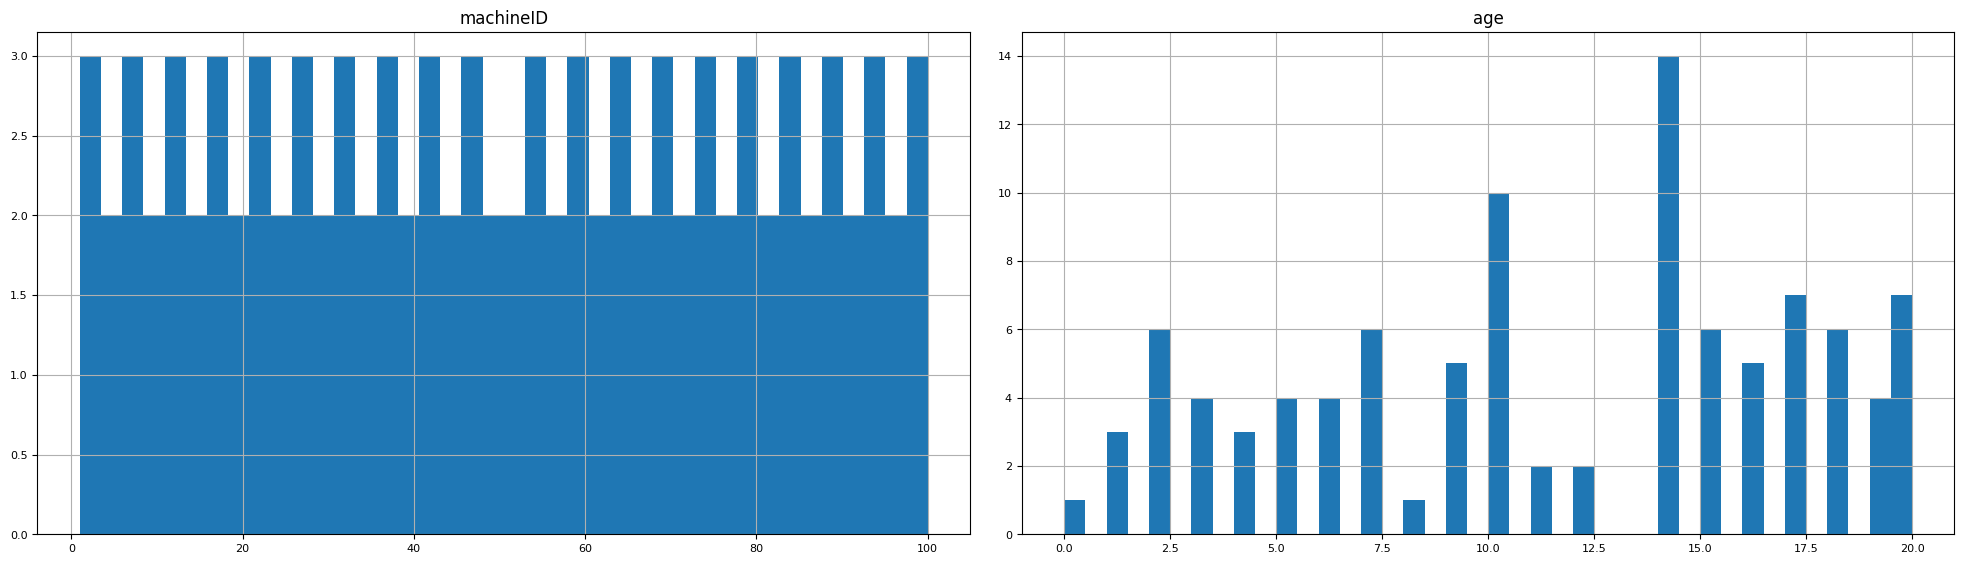

In [77]:
df_machine.hist(bins=40, figsize=(20, 6), xlabelsize='8', ylabelsize='8')
plt.tight_layout(pad=2.0)
plt.show()

Se tienen una buena distribución de los datos y sin presencia de datos atipicos.

**Se grafica la distribución de los modelos de las máquinas en los 100 equipos**

In [78]:
# Primero, agregamos una columna con el recuento de cada tipo de error
df_mach_counts = df_machine['model'].value_counts().reset_index()
df_mach_counts.columns = ['model', 'Count']

# Luego, ordenamos el DataFrame por el recuento en orden descendente
df_mach_counts = df_mach_counts.sort_values(by='Count', ascending=False)

# Ahora creamos el gráfico de barras con los datos ordenados
fig = px.bar(x=df_mach_counts['model'], y=df_mach_counts['Count'],
             title='Distribución de Modelos de Máquina en los 100 Equipos', template='plotly_dark', color=df_mach_counts['model'])
fig.update_layout(xaxis_title='Tipo de Modelos de Maquina', yaxis_title='Distribución')
fig.update_layout(legend_title_text='Modelos')
fig.show()

Existen 35 maquinas del modelo 03 y solo 16 maquinas del modelo 1

**Se grafica la distribución de la antiguedad vs el ID de cada máquina**

In [79]:
# Calcula el recuento de errores por machineID y los ordena de mayor a menor
mach_sorted = df_machine.sort_values(by=['age'],ascending=False).reset_index(drop=True)
mach_sorted['machineID'] = mach_sorted['machineID'].astype(str)
# Crea el gráfico de barras ordenando los datos
fig = px.bar(x=mach_sorted['machineID'],
             y=mach_sorted['age'],
             labels={'x':'ID de la Máquina', 'y':'Antigüedad'},
             title='Distribución de la Antigüedad de la Máquina',template='plotly_dark', color=mach_sorted['age'])

fig.update_layout(
    xaxis=dict(
        tickangle=90,
         tickfont=dict(size=8.5)),autosize=True,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

In [80]:
# Calcula el recuento de errores por machineID y los ordena de mayor a menor
mach_sorted = df_machine.sort_values(by=['age'],ascending=False).reset_index(drop=True)
mach_sorted['machineID'] = mach_sorted['machineID'].astype(str)
# Crea el gráfico de barras ordenando los datos
fig = px.bar(x=mach_sorted['machineID'],
             y=mach_sorted['age'],
             labels={'x':'ID de la Máquina', 'y':'Antigüedad'},
             title='Distribución de la Antigüedad de la Máquina (Agrupado por el Tipo de Modelo)',template='plotly_dark', color=mach_sorted['model'])

fig.update_layout(
    xaxis=dict(
        tickangle=90,
         tickfont=dict(size=8.5)),autosize=True,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

Se observa que existe una buena distribución de los modelos de mmaquinas y su antiguedad, el cual es de 0 a 20 años.

# SE UNEN TODOS LOS DATAFRAME
____________________________________________________

## COMBINANDO DATAFRAME DE 'df_telemetry' Y 'df_errors'

In [81]:
# COMBINANDO TABLA DE TELEMETRIA Y ERRORES

# Crear una columna con valor 1 para marcar la presencia de errores
df_copy_errors = df_errors.copy()
df_copy_errors['error'] = 1

# Pivotar el DataFrame para tener una columna por error
df_errors_pivot = df_copy_errors.pivot_table(index=['datetime', 'machineID'], columns='errorID', values='error', fill_value=0).reset_index()

# Realizar un merge en base a las columnas datetime y machineID
df_combined = pd.merge(df_telemetry, df_errors_pivot, on=['datetime', 'machineID'], how='left')

# Llenar los NaN resultantes del merge con 0 (ya que los errores no ocurridos se marcaron como 0)
df_combined.fillna(0, inplace=True)



In [82]:
df_combined.shape

(876100, 11)

## Separar el subconjunto de fallas (df_fail) en el dataframe df_maint, obteniendo un nuevo dataframe de cambios de componentes en mantto proactivo (df_maintp_2015).

In [83]:
# Cambiar el nombre de la columna 'failure' en df_fail a 'comp' para hacer la comparación
df_fail_copy = df_fail.rename(columns={'failure': 'comp'})

# Realizar un merge para identificar las filas coincidentes
df_merged = pd.merge(df_maint_2015, df_fail_copy, on=['datetime', 'machineID', 'comp'], how='left', indicator=True)

# Filtrar las filas que no están en df_fail
df_filtered = df_merged[df_merged['_merge'] == 'left_only']

# Eliminar la columna '_merge' y las columnas duplicadas
df_maintp_2015 = df_filtered[df_maint_2015.columns]
df_maintp_2015=df_maintp_2015.reset_index(drop=True)

In [84]:
df_maintp_2015.shape

(2143, 3)

## COMBINANDO DATAFRAME DE 'df_combined' Y 'df_maintp_2015'

In [85]:
# COMBINANDO TABLA DE df_combined Y df_maintp_2015

# Crear una columna con valor 1 para marcar la presencia de errores
df_copy_maintp15 = df_maintp_2015.copy()
df_copy_maintp15['maintp_comp'] = 1

# Pivotar el DataFrame para tener una columna por error
df_maint_pivot = df_copy_maintp15.pivot_table(index=['datetime', 'machineID'], columns='comp', values='maintp_comp', fill_value=0).reset_index()

# Realizar un merge en base a las columnas datetime y machineID
df_combined02 = pd.merge(df_combined, df_maint_pivot, on=['datetime', 'machineID'], how='left')

# Llenar los NaN resultantes del merge con 0 (ya que los errores no ocurridos se marcaron como 0)
df_combined02.fillna(0, inplace=True)

df_combined02 = df_combined02.rename(columns={'comp1': 'maintp_comp1',
                        'comp2': 'maintp_comp2',
                        'comp3': 'maintp_comp3',
                        'comp4': 'maintp_comp4'})

In [86]:
df_combined02.shape

(876100, 15)

## COMBINANDO DATAFRAME DE 'df_combined02' Y 'df_fail'

In [87]:
# COMBINANDO TABLA DE df_combined02 Y df_fail

# Crear una columna con valor 1 para marcar la presencia de errores
df_copy_fail = df_fail.copy()
df_copy_fail['fail_comp'] = 1

# Pivotar el DataFrame para tener una columna por error
df_fail_pivot = df_copy_fail.pivot_table(index=['datetime', 'machineID'], columns='failure', values='fail_comp', fill_value=0).reset_index()

# Realizar un merge en base a las columnas datetime y machineID
df_combined03 = pd.merge(df_combined02, df_fail_pivot, on=['datetime', 'machineID'], how='left')

# Llenar los NaN resultantes del merge con 0 (ya que los errores no ocurridos se marcaron como 0)
df_combined03.fillna(0, inplace=True)

df_combined03 = df_combined03.rename(columns={'comp1': 'fail_comp1',
                        'comp2': 'fail_comp2',
                        'comp3': 'fail_comp3',
                        'comp4': 'fail_comp4'})

In [88]:
df_combined03.shape

(876100, 19)

## COMBINANDO DATAFRAME DE 'df_combined03' Y 'df_machine'

In [89]:
# Realizar un merge para agregar las columnas model y age basadas en machineID
df_total = df_combined03.merge(df_machine, on='machineID', how='left')

# Reordenar las columnas para que model y age estén después de machineID
cols = ['datetime', 'machineID', 'model', 'age', 'volt', 'rotate', 'pressure', 'vibration',
       'error1', 'error2', 'error3', 'error4', 'error5', 'maintp_comp1',
       'maintp_comp2', 'maintp_comp3', 'maintp_comp4', 'fail_comp1',
       'fail_comp2', 'fail_comp3', 'fail_comp4']

df_total = df_total[cols]


In [90]:
# Mostrar el DataFrame resultante
df_total

,datetime,machineID,model,age,volt,rotate,pressure,vibration,error1,error2,...,error4,error5,maintp_comp1,maintp_comp2,maintp_comp3,maintp_comp4,fail_comp1,fail_comp2,fail_comp3,fail_comp4
0,2015-01-01 06:00:00,1,model3,18,176.217853,418.504078,113.077935,45.087686,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,model3,18,162.879223,402.747490,95.460525,43.413973,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,model3,18,170.989902,527.349825,75.237905,34.178847,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,model3,18,162.462833,346.149335,109.248561,41.122144,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,model3,18,157.610021,435.376873,111.886648,25.990511,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,model4,5,179.438162,395.222827,102.290715,50.771941,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876096,2016-01-01 03:00:00,100,model4,5,189.617555,446.207972,98.180607,35.123072,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876097,2016-01-01 04:00:00,100,model4,5,192.483414,447.816524,94.132837,48.314561,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876098,2016-01-01 05:00:00,100,model4,5,165.475310,413.771670,104.081073,44.835259,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
def fallatot(fail1,fail2,fail3,fail4):

  totfail= fail1 + fail2 + fail3 + fail4
  if totfail > 0:
      return 1
  else:
    return  0

In [92]:
df_tot = df_total.copy()
df_tot['fail_total'] = df_tot[['fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4']].apply(lambda row: fallatot(row['fail_comp1'], row['fail_comp2'], row['fail_comp3'], row['fail_comp4']), axis=1)

In [93]:
df_tot=df_tot.drop(columns=['fail_comp1','fail_comp2','fail_comp3','fail_comp4'])

In [94]:
df_tot

,datetime,machineID,model,age,volt,rotate,pressure,vibration,error1,error2,error3,error4,error5,maintp_comp1,maintp_comp2,maintp_comp3,maintp_comp4,fail_total
0,2015-01-01 06:00:00,1,model3,18,176.217853,418.504078,113.077935,45.087686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2015-01-01 07:00:00,1,model3,18,162.879223,402.747490,95.460525,43.413973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2015-01-01 08:00:00,1,model3,18,170.989902,527.349825,75.237905,34.178847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2015-01-01 09:00:00,1,model3,18,162.462833,346.149335,109.248561,41.122144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2015-01-01 10:00:00,1,model3,18,157.610021,435.376873,111.886648,25.990511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,model4,5,179.438162,395.222827,102.290715,50.771941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
876096,2016-01-01 03:00:00,100,model4,5,189.617555,446.207972,98.180607,35.123072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
876097,2016-01-01 04:00:00,100,model4,5,192.483414,447.816524,94.132837,48.314561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
876098,2016-01-01 05:00:00,100,model4,5,165.475310,413.771670,104.081073,44.835259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [95]:
df_tot.groupby(['model'])['fail_total'].sum()

model
model1    175
model2    160
model3    212
model4    172
Name: fail_total, dtype: int64

In [ ]:
df_tot99=df_tot.copy()

In [ ]:
df_tot99.head()

,datetime,machineID,model,age,volt,rotate,pressure,vibration,error1,error2,error3,error4,error5,maintp_comp1,maintp_comp2,maintp_comp3,maintp_comp4,fail_total
0,2015-01-01 06:00:00,1,model3,18,176.217853,418.504078,113.077935,45.087686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2015-01-01 07:00:00,1,model3,18,162.879223,402.747490,95.460525,43.413973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2015-01-01 08:00:00,1,model3,18,170.989902,527.349825,75.237905,34.178847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2015-01-01 09:00:00,1,model3,18,162.462833,346.149335,109.248561,41.122144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2015-01-01 10:00:00,1,model3,18,157.610021,435.376873,111.886648,25.990511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df_tot99.shape

(876100, 18)

In [ ]:
df_tot99['fail_total'].value_counts()

fail_total
0    875381
1       719
Name: count, dtype: int64

Debido a que las máquinas 6 y 77 no presentan registros de falla se eliminaran del conjunto de datos

In [ ]:
df_tot99[(df_tot99['machineID']==6) | (df_tot99['machineID']==77)]['fail_total'].value_counts()

fail_total
0    17522
Name: count, dtype: int64

## Ingenieria de Caracteristicas

## 1. Diferencias entre medidas consecutivas

In [ ]:
for col in ['volt', 'rotate', 'pressure', 'vibration']:
    df_tot99[f'diff_{col}'] = df_tot99[col].diff()

## 2. Media y desviación estándar de una ventana de tiempo de 3 horas

In [ ]:
for col in ['volt', 'rotate', 'pressure', 'vibration']:
    df_tot99[f'rolling_mean_{col}'] = df_tot99[col].rolling(window=3).mean()
    df_tot99[f'rolling_std_{col}'] = df_tot99[col].rolling(window=3).std()

## 3. Indicadores de errores

In [ ]:
df_tot99['total_errors'] = df_tot99[['error1', 'error2', 'error3', 'error4', 'error5']].sum(axis=1)

##4. Tiempo desde el último mantenimiento

In [ ]:
for comp in ['maintp_comp1', 'maintp_comp2', 'maintp_comp3', 'maintp_comp4']:
    df_tot99[f'time_since_last_{comp}'] = (df_tot99['datetime'] - df_tot99[df_tot99[comp] > 0]['datetime'].shift()).fillna(pd.Timedelta(seconds=0)).dt.total_seconds()

##5. Condición general de la máquina (un índice basado en las medidas)

In [ ]:
df_tot99['condition_index'] = df_tot99[['volt', 'rotate', 'pressure', 'vibration']].mean(axis=1)

Rellenar valores NaN generados por las diferencias y las ventanas móviles

In [ ]:
df_tot99.fillna(0, inplace=True)

In [ ]:
df_tot99

,datetime,machineID,model,age,volt,rotate,pressure,vibration,error1,error2,...,rolling_mean_pressure,rolling_std_pressure,rolling_mean_vibration,rolling_std_vibration,total_errors,time_since_last_maintp_comp1,time_since_last_maintp_comp2,time_since_last_maintp_comp3,time_since_last_maintp_comp4,condition_index
0,2015-01-01 06:00:00,99,model1,14,168.596133,384.747105,110.921131,41.944692,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,176.552265
1,2015-01-01 07:00:00,99,model1,14,153.667693,441.288719,128.011446,39.271527,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,190.559846
2,2015-01-01 08:00:00,99,model1,14,178.319255,512.612661,128.526147,42.975412,0.0,0.0,...,122.486241,10.018985,41.397210,1.911673,0.0,0.0,0.0,0.0,0.0,215.608369
3,2015-01-01 09:00:00,99,model1,14,162.163821,493.356626,114.435754,40.044016,0.0,0.0,...,123.657782,7.990656,40.763651,1.953995,0.0,0.0,0.0,0.0,0.0,202.500054
4,2015-01-01 10:00:00,99,model1,14,180.201336,550.512296,110.771891,43.054530,0.0,0.0,...,117.911264,9.373515,42.024652,1.715738,0.0,0.0,0.0,0.0,0.0,221.135013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2016-01-01 02:00:00,99,model1,14,166.719608,462.956239,101.251044,44.450916,0.0,0.0,...,96.735850,4.232915,44.913658,6.509766,0.0,0.0,0.0,0.0,0.0,193.844452
8757,2016-01-01 03:00:00,99,model1,14,168.434193,462.373730,98.379062,35.391502,0.0,0.0,...,97.495818,4.265986,43.828289,8.143345,0.0,0.0,0.0,0.0,0.0,191.144622
8758,2016-01-01 04:00:00,99,model1,14,191.505730,418.940906,101.018747,43.204243,0.0,0.0,...,100.216285,1.595315,41.015554,4.910297,0.0,0.0,0.0,0.0,0.0,188.667407
8759,2016-01-01 05:00:00,99,model1,14,185.423810,416.284422,99.564561,38.006329,0.0,0.0,...,99.654124,1.322120,38.867358,3.976903,0.0,0.0,0.0,0.0,0.0,184.819780


In [ ]:
df_tot99=df_tot99.drop(columns=['machineID'	, 'model',	'age'])

# División de Conjunto de Datos

In [ ]:
# División del conjunto de datos
train_start = '2015-01-01'
train_end = '2015-10-31'
test_start = '2015-11-01'
test_end = '2015-12-31'

In [ ]:
train_df = df_tot99[(df_tot99['datetime'] >= train_start) & (df_tot99['datetime'] <= train_end)]
test_df = df_tot99[(df_tot99['datetime'] >= test_start) & (df_tot99['datetime'] <= test_end)]

In [ ]:
print(
    f"Fechas train      : {train_df['datetime'].min()} --- {train_df['datetime'].max()}  "
    f"(n={len(train_df)})"
)
print(
    f"Fechas test       : {test_df['datetime'].min()} --- {test_df['datetime'].max()}  "
    f"(n={len(test_df)})"
)

Fechas train      : 2015-01-01 06:00:00 --- 2015-10-31 00:00:00  (n=7267)
Fechas test       : 2015-11-01 00:00:00 --- 2015-12-31 00:00:00  (n=1441)


In [ ]:
X_train_df = train_df.drop(columns=['datetime', 'fail_total'])
y_train_df = train_df['fail_total']
X_test_df = test_df.drop(columns=['datetime', 'fail_total'])
y_test_df = test_df['fail_total']

In [ ]:
train_df['fail_total'].value_counts()

fail_total
0    7250
1      17
Name: count, dtype: int64

# Escalar las Características

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range = (0, 1))
X_train_df = scaler.fit_transform(X_train_df)
X_test_df = scaler.transform(X_test_df)

## Modelo XGBoost Binary

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Create an instance of the XGBClassifier
model = XGBClassifier(objective='binary:logistic')

# Fit the model to the training data
model.fit(X_train_df, y_train_df)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predecir las etiquetas de los datos nuevos
y_pred = model.predict(X_test_df)

Evaluar el rendimiento del modelo

In [ ]:
# calculen la exactitud de la clasificación
train_score = model.score(X_train_df, y_train_df)
test_score = model.score(X_test_df, y_test_df)
print(f'Métrica de Entrenamiento',train_score)
print(f'Métrica de Prueba',test_score)

Métrica de Entrenamiento 1.0
Métrica de Prueba 0.9979181124219292


Evaluar la predicción

In [ ]:
print(f'Accuracy Score =', accuracy_score(y_test_df,y_pred))
print(f'Precision Score =', precision_score(y_test_df,y_pred, average='weighted'))
print(f'Recall Score =', recall_score(y_test_df, y_pred, average='weighted'))
print(f'F1 Score =', f1_score(y_test_df,y_pred, average='weighted'))
print('\nReporte de Clasificación:\n')
print(classification_report(y_test_df, y_pred))

Accuracy Score = 0.9979181124219292
Precision Score = 0.9972251137327474
Recall Score = 0.9979181124219292
F1 Score = 0.9975714927232762

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1439
           1       0.00      0.00      0.00         2

    accuracy                           1.00      1441
   macro avg       0.50      0.50      0.50      1441
weighted avg       1.00      1.00      1.00      1441



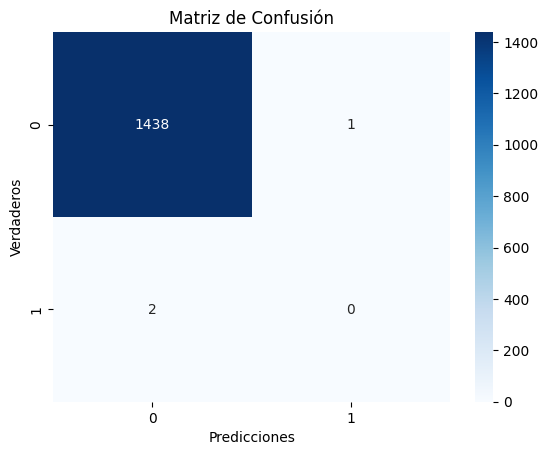

In [ ]:
cm = confusion_matrix(y_test_df, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
df_tot99['fail_total'].value_counts()

fail_total
0    8742
1      19
Name: count, dtype: int64

In [ ]:
y_test_df.value_counts()

fail_total
0    1439
1       2
Name: count, dtype: int64

In [ ]:
fig = px.line(test_df.index, y_test_df.values,
              title='Probabilities of failures over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Prob')
fig.show()

Mantenimiento Preventivo Completo: Inspección detallada, limpieza interna, verificación de sellos y empaques, revisión de la alineación y ajuste de componentes. Tiempo estimado: 6-8 horas.Mantenimiento Preventivo Completo: Inspección detallada, limpieza interna, verificación de sellos y empaques, revisión de la alineación y ajuste de componentes. Tiempo estimado: 6-8 horas.

In [ ]:
# Estimación de horas de mantenimiento correctivo por componente
horas_mantenimientoc = {
    'fail_comp1': 5,
    'fail_comp2': 3,
    'fail_comp3': 4,
    'fail_comp4': 6
}

In [ ]:
# Crear un DataFrame a partir del diccionario
df_fallas = pd.DataFrame(list(horas_mantenimientoc.items()), columns=['Tipo de Falla', 'Horas'])

# Mostrar el DataFrame
df_fallas

,Tipo de Falla,Horas
0,fail_comp1,5
1,fail_comp2,3
2,fail_comp3,4
3,fail_comp4,6


In [ ]:
# Estimación de horas de mantenimiento programado por componente
horas_mantenimientop = {
    'fail_comp1': 8,
    'fail_comp2': 8,
    'fail_comp3': 8,
    'fail_comp4': 8
}

comp4: la falla de este componente predommina en el cluster 02
El clúster 2 tiene la vibración promedio más alta (50.27), lo que puede estar correlacionado con su mayor incidencia de errores y fallas. Monitorear y controlar la vibración puede ser clave para reducir las fallas.

La bomba vibra:.

 Alineación incorrecta.
 Los cimientos no son lo suficiente rígidos.
 El impulsor está parcialmente obstruido.
 Defectos mecánicos: anillos de la carcasa desgastados; impulsor dañado; carcasa o sello
defectuoso.
 Los tubos de aspiración y descargue no están anclados.
 Hay cavitación de la bomba debido a una altura de aspiración demasiado alta.
 Arrastre de aire en la aspiración de la bomba debido a una inmersión poco profunda.

durción de parada aproximadamente  3 horas


comp2: la falla de este componente predomina en el cluster 1.
El clúster 1 tiene una rotación significativamente menor (370.96) que los demás, pero aún muestra altas tasas de fallas en el componente 2. Es posible que se requiera una revisión específica de este componente.

La bomba sobrecarga el motor
 Velocidad demasiado alta.
-Desgaste de Componentes Internos: Componentes como los rodamientos o los sellos pueden desgastarse, causando un funcionamiento irregular.

 La altura piezometrica es más baja que la nominal, por lo tanto se bombea demasiada agua.
(esto es válido para las bombas de velocidad baja especificas).
 Defectos mecánicos: anillos de la carcasa desgastados; impulsor dañado; carcasa o sello
defectuoso.
 Frotación debido a materia extraña en la bomba entre los anillos de la carcasa y el impulsor.

duración de parada aprox. 2 horas


comp1: la falla de este componente predomina en el cluster 4. El clúster 4 tiene un voltaje promedio significativamente más alto (190.07) que los demás. Esto podría indicar condiciones operativas más exigentes que podrían afectar la durabilidad de las bombas.

Daños en el Motor de la Bomba:

Sobrecalentamiento: El motor puede sobrecalentarse debido a la mayor corriente, reduciendo su vida útil.
Desgaste Prematuro de Componentes: Bobinas, rodamientos y otros componentes pueden desgastarse prematuramente.

Problemas Mecánicos:

Vibraciones Excesivas: El motor puede generar vibraciones excesivas que afecten la integridad estructural de la bomba y sus componentes.
Desbalanceo: Cambios en la velocidad de operación pueden causar desbalanceo y daño a los impulsores y sellos.

La bomba sobrecarga el motor
 Velocidad demasiado alta.
 La altura piezometrica es más baja que la nominal, por lo tanto se bombea demasiada agua.
(esto es válido para las bombas de velocidad baja especificas).
 Defectos mecánicos: anillos de la carcasa desgastados; impulsor dañado; carcasa o sello
defectuoso.
 Frotación debido a materia extraña en la bomba entre los anillos de la carcasa y el impulsor.


duracion de para aproxiamda 3 horas


comp3: la falla del componente 03 predomina en el cluster 03. El cluster 3 presenta niveles de presion alta, con un promedio de (125.67).

Consecuencias de la Presión Excesiva
Daños a la Bomba y al Sistema: Puede causar daños estructurales a la bomba, tuberías, y otros componentes del sistema.
Fugas: Incrementa el riesgo de fugas en juntas, sellos y conexiones
Desgaste Prematuro: Aumenta el desgaste en los rodamientos, sellos y otras partes móviles.
Fallas en el Sellado: Aumenta el riesgo de fallas en los sellos, lo que puede resultar en fugas.

duracion de parada aproxiamda 4 horas


In [ ]:
#df_telemetry.describe().T

In [ ]:
#df_total[(df_total['error1']==1) & (df_total['machineID']==1)]

In [ ]:
#df_total[((df_total['fail_comp1']==1) | (df_total['fail_comp2']==1) | (df_total['fail_comp3']==1) | (df_total['fail_comp4']==1)) & (df_total['machineID']==1)]

In [ ]:
#df_tot[((df_tot['fail_comp1']==1) | (df_tot['fail_comp2']==1) | (df_tot['fail_comp3']==1) | (df_tot['fail_comp4']==1)) & (df_tot['machineID']==2)]

In [ ]:
#df_total.info()

In [ ]:
#df_tot.info()

# PREPROCESAMIENTO

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
set_config(display='diagram')

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score , confusion_matrix , classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier

from xgboost import XGBClassifier, XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

#Ingeniería de Características

Se genera nuevas características basadas en estadísticas de ventanas temporales.

In [ ]:
def create_features(df):
    df = df.copy()
    df['volt_rolling_mean'] = df['volt'].rolling(window=24).mean()
    df['rotate_rolling_mean'] = df['rotate'].rolling(window=24).mean()
    df['pressure_rolling_mean'] = df['pressure'].rolling(window=24).mean()
    df['vibration_rolling_mean'] = df['vibration'].rolling(window=24).mean()
    df = df.fillna(method='bfill')
    return df

train_data = create_features(train_data)
val_data = create_features(val_data)
test_data = create_features(test_data)

In [ ]:
# Codificar la columna 'model'
encoder = OneHotEncoder()
encoded_models = encoder.fit_transform(df_total[['model']]).toarray()

In [ ]:
# Añadir la codificación al dataframe original
model_columns = ['model_' + str(int(i)) for i in range(encoded_models.shape[1])]
encoded_df = pd.DataFrame(encoded_models, columns=model_columns)

data_encoded = pd.concat([df_total.reset_index(drop=True), encoded_df], axis=1)

In [ ]:
train_data_encoded = data_encoded[(data_encoded['datetime'] >= '2015-01-01') & (data_encoded['datetime'] < '2015-09-01')]
val_data_encoded = data_encoded[((data_encoded['datetime'] >= '2015-09-01') & (data_encoded['datetime'] < '2015-10-01')) |
                                ((data_encoded['datetime'] >= '2015-11-01') & (data_encoded['datetime'] < '2015-12-01'))]
test_data_encoded = data_encoded[(data_encoded['datetime'] >= '2015-12-01') & (data_encoded['datetime'] < '2016-01-01')]

In [ ]:
train_data_encoded = create_features(train_data_encoded)
val_data_encoded = create_features(val_data_encoded)
test_data_encoded = create_features(test_data_encoded)

In [ ]:
features = ['age', 'volt', 'rotate', 'pressure', 'vibration', 'volt_rolling_mean', 'rotate_rolling_mean', 'pressure_rolling_mean', 'vibration_rolling_mean', 'error1', 'error2', 'error3', 'error4', 'error5'] + model_columns
target_fallas = ['fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4']

X_train = train_data_encoded[features]
y_train_fallas = train_data_encoded[target_fallas]

X_val = val_data_encoded[features]
y_val_fallas = val_data_encoded[target_fallas]

X_test = test_data_encoded[features]
y_test_fallas = test_data_encoded[target_fallas]